### Import Packages

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine_df = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* **Integer/Floats :** PassengerId, Pclass, Age, SibSp, Parch, Fare.
* **Strings (object) :** Name, Sex, Ticket, Cabin, Embarked.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived  
Passenger survival  
0 = No  
1 = Yes 

Embarked :   
Port of Embarkation  
C = Cherbourg   
Q = Queenstown  
S = Southampton 

Pclass:  
A proxy for socio-economic status (SES).  
1st = Upper  
2nd = Middle  
3rd = Lower  

SibSp:  
The dataset defines family relations in this way  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

Parch:  
The dataset defines family relations in this way  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train_df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

* **Categorical features :** Survived, Sex, and Embarked.   
* **Ordinal features :** Pclass.   
* **Continous features :** Age, Fare. 
* **Discrete :** SibSp, Parch.

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

In [13]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
train_df[train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
(train_df['Cabin'].isnull().sum()/(train_df['Cabin'].notnull().sum() + train_df['Cabin'].isnull().sum()))*100

77.10437710437711

In [17]:
(train_df['Age'].isnull().sum()/(train_df['Age'].notnull().sum() + train_df['Age'].isnull().sum()))*100

19.865319865319865

In [18]:
(train_df['Embarked'].isnull().sum()/(train_df['Embarked'].notnull().sum() + train_df['Embarked'].isnull().sum()))*100

0.22446689113355783

In [19]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Cabin > Age > Fare features contain a number of null values in that order for the training dataset.

In [20]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
test_df[test_df['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
test_df[test_df['Cabin'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
(test_df['Cabin'].isnull().sum()/(test_df['Cabin'].notnull().sum() + test_df['Cabin'].isnull().sum()))*100

78.22966507177034

In [24]:
(test_df['Age'].isnull().sum()/(test_df['Age'].notnull().sum() + test_df['Age'].isnull().sum()))*100

20.574162679425836

In [25]:
(test_df['Fare'].isnull().sum()/(test_df['Fare'].notnull().sum() + test_df['Fare'].isnull().sum()))*100

0.23923444976076555

In [26]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [27]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [28]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Backstrom, Mr. Karl Alfred",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [29]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Rothschild, Mr. Martin",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [30]:
train_df.duplicated(subset='Ticket').sum()

210

In [31]:
col = train_df.columns.values
for sub in col:
    print(sub+' : '+str(train_df.duplicated(subset=sub, keep='first').sum()))

PassengerId : 0
Survived : 889
Pclass : 888
Name : 0
Sex : 889
Age : 802
SibSp : 884
Parch : 884
Ticket : 210
Fare : 643
Cabin : 743
Embarked : 887


In [32]:
(train_df.duplicated(subset='Ticket').sum()/train_df['Ticket'].count())*100

23.56902356902357

Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Cabin and Embarked feautres are normale to be duplicated because they are categoricial features. But, Ticket feature it have to be unique cuz every passengers must have a unique ticket.

**Analyze by pivoting features**

In [33]:
train_df['Survived'].count()

891

In [34]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [35]:
train_df['Survived'].value_counts()/train_df['Survived'].count()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [36]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,male,577
0,female,314


In [37]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Pclass,Survived
2,3,491
0,1,216
1,2,184


In [38]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Embarked,Survived
2,S,644
0,C,168
1,Q,77


In [39]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).count().sort_values(by='Survived', ascending=False)

,SibSp,Survived
0,0,608
1,1,209
2,2,28
4,4,18
3,3,16
6,8,7
5,5,5


In [40]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Parch,Survived
0,0,678
1,1,118
2,2,80
3,3,5
5,5,5
4,4,4
6,6,1


In [41]:
survived_pass = train_df.query('Survived==1')
survived_pass['Survived'].count()

342

In [42]:
survived_pass['Pclass'].value_counts()/survived_pass['Pclass'].count()

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

In [43]:
survived_pass['Sex'].value_counts()/survived_pass['Sex'].count()

female    0.681287
male      0.318713
Name: Sex, dtype: float64

In [44]:
survived_pass['Embarked'].value_counts()/survived_pass['Embarked'].count()

S    0.638235
C    0.273529
Q    0.088235
Name: Embarked, dtype: float64

In [45]:
survived_pass['SibSp'].value_counts()/survived_pass['SibSp'].count()

0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: SibSp, dtype: float64

In [46]:
survived_pass['Parch'].value_counts()/survived_pass['Parch'].count()

0    0.681287
1    0.190058
2    0.116959
3    0.008772
5    0.002924
Name: Parch, dtype: float64

**Analyze by visualizing data**

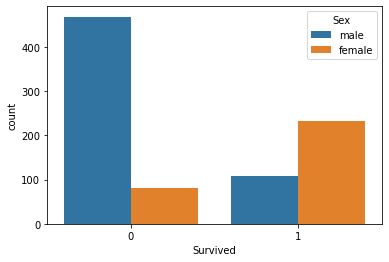

In [47]:
sns.countplot(x='Survived', hue='Sex', data=train_df);

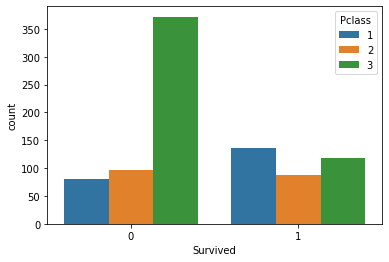

In [48]:
sns.countplot(x='Survived', hue='Pclass', data=train_df);

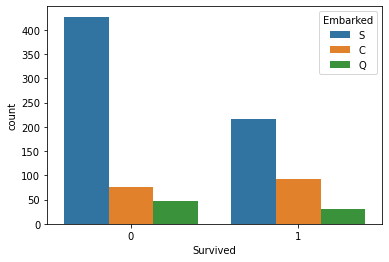

In [49]:
sns.countplot(x='Survived', hue='Embarked', data=train_df);

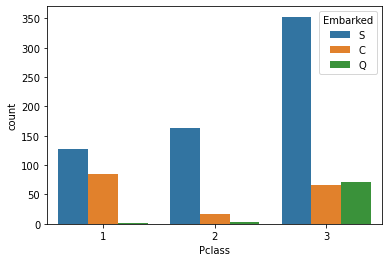

In [50]:
sns.countplot(x='Pclass', hue='Embarked', data=train_df);

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


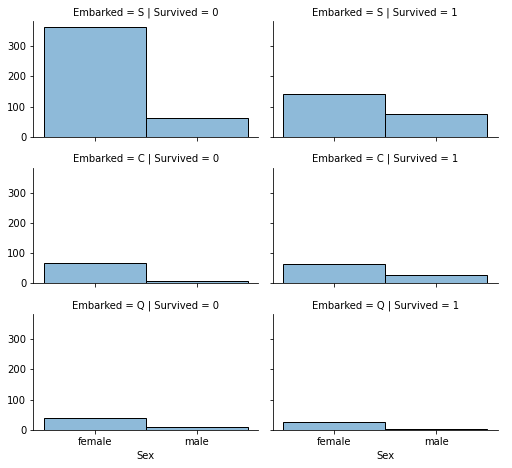

In [51]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
#grid.map(sns.histplot, 'Sex', alpha=.5, ci=None)
grid.map(sns.histplot, 'Sex', alpha=.5)
grid.add_legend();

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


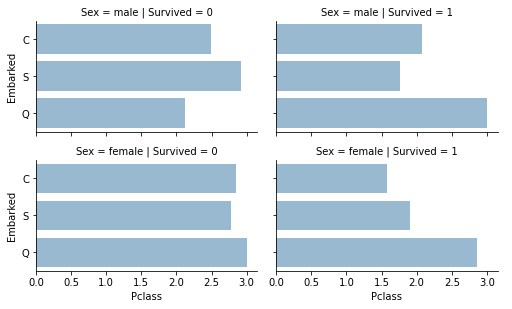

In [52]:
grid = sns.FacetGrid(train_df, row='Sex', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Pclass', 'Embarked', alpha=.5, ci=None)
grid.add_legend();

**Correlating features**

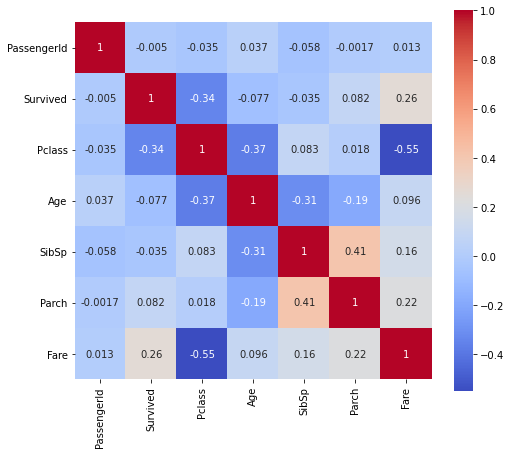

In [53]:
corr = train_df.corr()
plt.subplots(figsize=(8,7))
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True);

Pclass correlate with Fare => correlation medium & negative  
Survived correlate with Pclass => correlation week & negative  
Pclass correlate with Age => correlation week & negative  
SibSp correlate with Age  => correlation week & negative  

Correlating numerical features

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


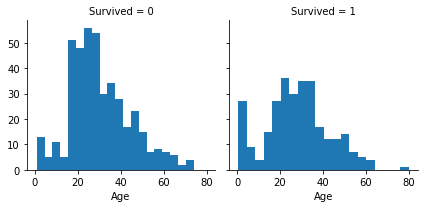

In [54]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

The passengers of 18-30 old years didn't survived   
Children with age<4 had high survived rate  
The most passengers was in range 18-38  

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


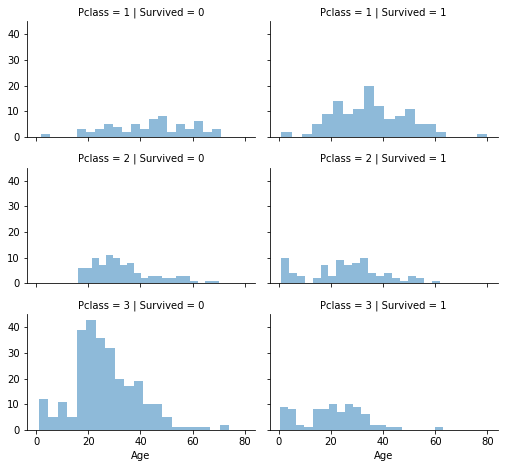

In [55]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The most survived were in the first Pclass  
the most passengers were in the third Pclass but they didn't survived   
the children of the second and the third Pclass survived   

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


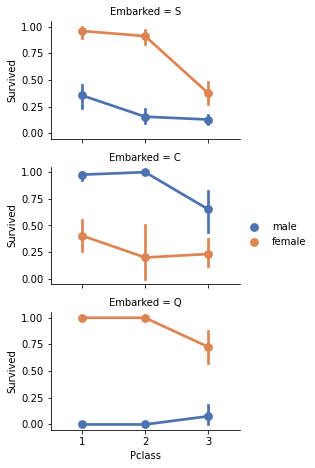

In [56]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

Embarked have impact on the survived feature.    
Female are the most survived passengers. exception in Embarked=C Male are the most survived in this category.  
Male had a better rate in Pclass=3 compared Pclass=2 for C and Q ports.  
Embarked have impact on survived passengers for Pclass=3.  

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


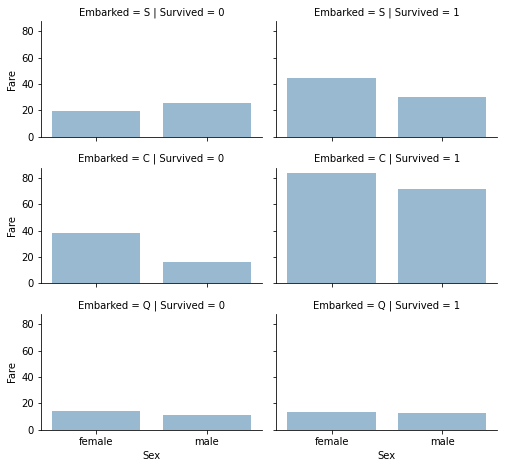

In [57]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

Ports embarked have impact on survived, it rate change by changing the category.  
In Ports Embarked=S and Embarked=C, passengers with high fare survived.   

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


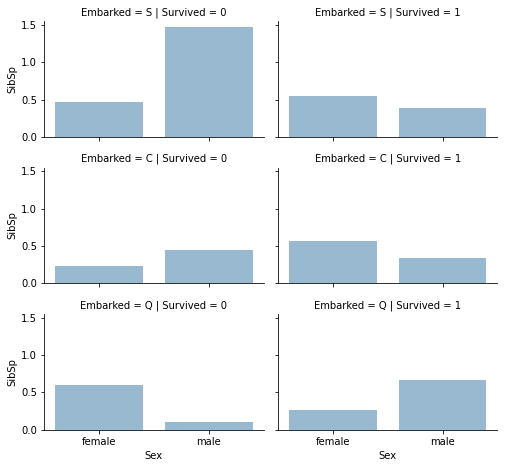

In [58]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'SibSp', alpha=.5, ci=None)
grid.add_legend();

In [59]:
train_df[['SibSp', 'Survived']].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
4      0            15
2      0            15
       1            13
3      0            12
8      0             7
5      0             5
3      1             4
4      1             3
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


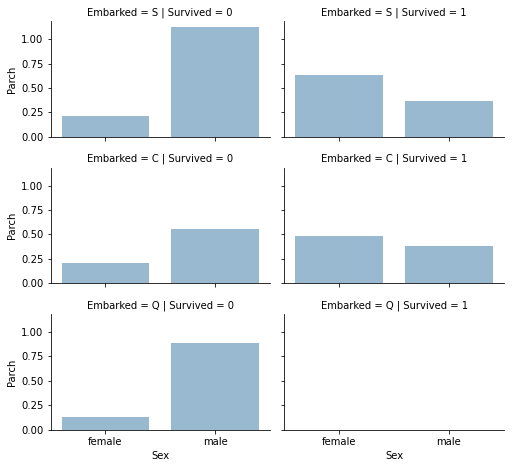

In [60]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Parch', alpha=.5, ci=None)
grid.add_legend();

In [61]:
train_df[['Parch', 'Survived']].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      1            40
       0            40
5      0             4
4      0             4
3      1             3
       0             2
6      0             1
5      1             1
dtype: int64

### Quality and Tidiness

**Erroneous datatype :**  
* Sex and Emarked features are string.

**Null and Duplicated Values :**  
* Age, Cabin, Emarked and Fare features have null values.
* Cabin feature have more then 77% of null values.
* Ticket feature have 23% of duplicated values.

### Solution 

* Change type of Sex and Embarked features from object to numeric. 
* Delete Cabin and Ticket features.    
* Handle the missing values in Age, Embarked and Fare features.

### Cleaning Data

In [62]:
train_copy = train_df.copy()

In [63]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Handle the missing values in Age, Embarked and Fare features.

In [64]:
train_copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We observe that the columns **Pclass**, **Parch** and **SibSp** are correlate with column **Age**. So we will use this columns to **predict the missing values of Age.**

In [65]:
df = train_copy[['Age', 'Pclass', 'SibSp', 'Parch']]
print(df.shape)
df.head()

(891, 4)


,Age,Pclass,SibSp,Parch
0,22.0,3,1,0
1,38.0,1,1,0
2,26.0,3,0,0
3,35.0,1,1,0
4,35.0,3,0,0


testing which alogorithm will best predict age.

In [66]:
age_df = df.dropna()
age_df.shape

(714, 4)

In [68]:
age_df = df.dropna()
xage = age_df.drop('Age', axis=1)
yage = age_df['Age']
xage_train, xage_test, yage_train, yage_test = train_test_split(xage, yage, test_size=0.33, random_state=42)
model_LR1 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=2)
model_LR1.fit(xage_train , yage_train)

LinearRegression(n_jobs=2, normalize=True)

In [69]:
yage_pred = model_LR1.predict(xage_test)
print(yage_test.shape)
print(yage_pred.shape)
#print(LR1.score(yage_test, yage_pred))
print("\tMean absolute error:", metrics.mean_absolute_error(yage_test, yage_pred))
print("\tMean squared error:", np.sqrt(metrics.mean_squared_error(yage_test, yage_pred)))
print("\tExplained variance:", metrics.explained_variance_score(yage_test, yage_pred))
print("\tR2 score:", metrics.r2_score(yage_test, yage_pred))

(236,)
(236,)
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043


In [70]:
yage_test.shape

(236,)

In [71]:
t_df = pd.DataFrame(yage_pred, columns=['age_pred'])
t_df['yage'] = yage_test
t_df

,age_pred,yage
0,34.256462,NaN
1,29.019945,NaN
2,29.625932,26.0
3,40.331519,NaN
4,28.181406,NaN
...,...,...
231,27.575419,NaN
232,28.181406,NaN
233,29.625932,NaN
234,35.095001,NaN


In [72]:
age_df = df.dropna()
xage = age_df.drop('Age', axis=1)
yage = age_df['Age']
xage_train, xage_test, yage_train, yage_test = train_test_split(xage, yage, test_size=0.33, random_state=42)
model_SVR = [SVR(),LinearSVR(),NuSVR()]
for model in model_SVR:
    model.fit(xage_train, yage_train)
    y_pred = model.predict(xage_test)   
    print(model)
    print("\tMean absolute error:", metrics.mean_absolute_error(yage_test, yage_pred))    
    print("\tMean squared error:", np.sqrt(metrics.mean_squared_error(yage_test, yage_pred)))
    print("\tExplained variance:", metrics.explained_variance_score(yage_test, yage_pred))
    print("\tR2 score:", metrics.r2_score(yage_test, yage_pred))
    print()

SVR()
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043

LinearSVR()
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043

NuSVR()
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043



In [73]:
age_df = df.dropna()
xage = age_df.drop('Age', axis=1)
yage = age_df['Age']
xage_train, xage_test, yage_train, yage_test = train_test_split(xage, yage, test_size=0.33, random_state=42)
regressors = [
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             SVR(kernel='sigmoid')]
for model in regressors:
    model.fit(xage_train, yage_train)
    y_pred = model.predict(xage_test)   
    print(model)
    print("\tMean absolute error:", metrics.mean_absolute_error(yage_test, yage_pred))    
    print("\tMean squared error:", np.sqrt(metrics.mean_squared_error(yage_test, yage_pred)))
    print("\tExplained variance:", metrics.explained_variance_score(yage_test, yage_pred))
    print("\tR2 score:", metrics.r2_score(yage_test, yage_pred))
    print()

SVR(kernel='linear')
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043

SVR(kernel='poly')
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043

SVR()
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043

SVR(kernel='sigmoid')
	Mean absolute error: 9.565555884570076
	Mean squared error: 12.172688805024164
	Explained variance: 0.23354572069576185
	R2 score: 0.22227417723527043



In [74]:
dataset = df.copy() 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Pclass  891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [75]:
dataset["age"] = dataset["Age"].interpolate(method='linear', limit_direction='forward', axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Pclass  891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   age     891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [76]:
dataset.sample(10)

,Age,Pclass,SibSp,Parch,age
497,NaN,3,0,0,39.5
164,1.0,3,4,1,1.0
607,27.0,1,0,0,27.0
765,51.0,1,1,0,51.0
584,NaN,3,0,0,27.0
299,50.0,1,0,1,50.0
838,32.0,3,0,0,32.0
549,8.0,2,1,1,8.0
229,NaN,3,3,1,26.5
508,28.0,3,0,0,28.0


After analyzing, I decided to use interpolation to deal with missing values of age column and embarked column using linear method

In [83]:
train_copy['age'] = train_copy["Age"].interpolate(method='linear', limit_direction='forward', axis=0)
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age          891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [86]:
train_copy['embarked'] = train_copy["Embarked"].interpolate(method='linear', limit_direction='forward', axis=0)
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age          891 non-null    float64
 13  embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [84]:
train_copy.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,29.00
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S,18.00
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S,26.00
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,71.00
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S,24.00
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,50.00
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,62.00
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C,42.25
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,14.00
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,32.00


 * Change type of Sex from object to numeric

In [81]:
#converting Sex feature to a new feature called Gender where female=0 and male=1
from sklearn.preprocessing import LabelEncoder

train_tit_df['Gender'] = LabelEncoder().fit_transform(train_tit_df['Sex'])
train_tit_df.head()

NameError: name 'train_tit_df' is not defined

In [ ]:
train_df_copy.drop(labels=[61, 829], axis=0, inplace=True)

In [ ]:
train_df_copy.isnull().sum()

In [ ]:
train_df_copy.drop(labels='Cabin', axis=1, inplace=True)

In [ ]:
train_df_copy.isnull().sum()

In [ ]:
train_df_copy['agebins'] = pd.qcut(train_df_copy['Age'], 4)
train_df_copy['agebins'].unique()

In [ ]:
for dataset in [train_df_copy]:    
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 28), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 38), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 80), 'Age'] = 3
    
train_df_copy.head()

In [ ]:
train_df_copy.info()

In [ ]:
train_df_copy.isnull().sum()

In [ ]:
df_agenull = train_df_copy[train_df_copy['Age'].isnull()]
df_agenull.isnull().sum()

In [ ]:
df_agenull.info()

In [ ]:
df_agenotnull = train_df_copy[~train_df_copy['Age'].isnull()]
df_agenotnull.info()

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
df_agenotnull.columns

In [ ]:
df_agenotnull['Ticket'].value_counts()

In [ ]:
df_agenotnull.info()

Male --> 1  
Female --> 0

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_agenotnull['sex'] = LabelEncoder().fit_transform(df_agenotnull['Sex'])

S -- 2  
C -- 0  
Q -- 1  


In [ ]:
df_agenotnull['embarked'] = LabelEncoder().fit_transform(df_agenotnull['Embarked'])

In [ ]:
df_agenotnull.info()

In [ ]:
df_agenotnull.head()

In [ ]:
df_agenotnull[['Embarked', 'embarked']]

In [ ]:
df_agenotnull[['Sex', 'sex']]

In [ ]:
df_agenotnull = df_agenotnull.drop(columns=['Sex', 'Embarked'], axis=1)

In [ ]:
df_agenotnull.info()

In [ ]:
X = df_agenotnull[['Survived', 'Pclass', 'sex', 'SibSp','Parch', 'Fare', 'embarked']]
Y = df_agenotnull[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
clf_svc = SVC(kernel='linear')
clf_svc.fit(X_train, y_train)

In [ ]:
y_pred_svc = clf_svc.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_svc)

In [ ]:
clf_svcr = SVC(kernel='rbf', C=10000)
clf_svcr.fit(X_train, y_train)

In [ ]:
y_pred_svcr = clf_svcr.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_svcr)

In [ ]:
clf_svcp = SVC(kernel='poly', C=10000)
clf_svcp.fit(X_train, y_train)
y_pred_svcp = clf_svcp.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_svcp)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = clf_nb.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_nb)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

In [ ]:
clf_LR = LogisticRegression(solver='liblinear', C=0.01, penalty='l2', max_iter=300)
clf_LR.fit(X_train, y_train)
y_pred_LR= clf_LR.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_LR)

In [ ]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=2)
rg.fit(X_train, y_train)

In [ ]:
y_pred_rg = rg.predict(X_test)

In [ ]:
y_pred_rg

In [ ]:
metrics.accuracy_score(y_test, np.argmax(y_pred_rg, axis=1))

In [ ]:
from sklearn.preprocessing import StandardScaler    
stdr = StandardScaler()    
Xtrain= stdr.fit_transform(X_train)    
Xtest= stdr.transform(X_test)  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
clf_knn.fit(Xtrain, y_train) 

In [ ]:
y_pred_knn = clf_knn.predict(Xtest)

In [ ]:
metrics.accuracy_score(Xtest, y_pred_knn)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
y_pred_rfr

In [ ]:
metrics.accuracy_score(y_test_r, y_pred_rfr)

In [ ]:
clf_svcr = SVC(kernel='rbf', C=10000)
clf_svcr.fit(X_train, y_train)
y_pred_svcr = clf_svcr.predict(X_test)
metrics.accuracy_score(y_test, y_pred_svcr)

In [ ]:
df_age = df_agenull['Age']
df_age = df_age.to_numpy()
df_age

In [ ]:
age_pred = clf_svcr.predict(df_age)
age_pred